<a href="https://colab.research.google.com/github/rama96/digits_classifier/blob/master/digits_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 8.3MB/s 
     |████████████████████████████████| 1.2MB 38.1MB/s 
     |████████████████████████████████| 194kB 49.7MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 61kB 9.6MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
Mounted at /content/gdrive


In [3]:
#hide
from fastai.vision.all import *
from fastbook import *



In [4]:
path = untar_data(URLs.MNIST)

In [5]:
#hide
Path.BASE_PATH = path

In [6]:
path.ls()

(#2) [Path('testing'),Path('training')]

In [7]:
!ls

gdrive	sample_data


In [8]:
ones = (path/'training'/'1').ls().sorted()


In [9]:
im1_path = ones[0]
im1 = Image.open(im1_path)
im1

In [10]:
file_path = (path/'training')
files = get_image_files(file_path)

In [11]:
files

(#60000) [Path('training/3/5547.png'),Path('training/3/10993.png'),Path('training/3/51268.png'),Path('training/3/56275.png'),Path('training/3/25671.png'),Path('training/3/47280.png'),Path('training/3/361.png'),Path('training/3/31349.png'),Path('training/3/41015.png'),Path('training/3/32563.png')...]

In [12]:
db = DataBlock(
        blocks=(ImageBlock, CategoryBlock), 
        get_items=get_image_files, 
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label,
        item_tfms=Resize(128))

In [13]:
dls = db.dataloaders(file_path)
learn = cnn_learner(dls, resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [15]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [17]:
learn.fit_one_cycle(2,0.05)

epoch,train_loss,valid_loss,error_rate,time
0,0.312578,0.462406,0.071583,01:36
1,0.054560,0.030530,0.009167,01:35


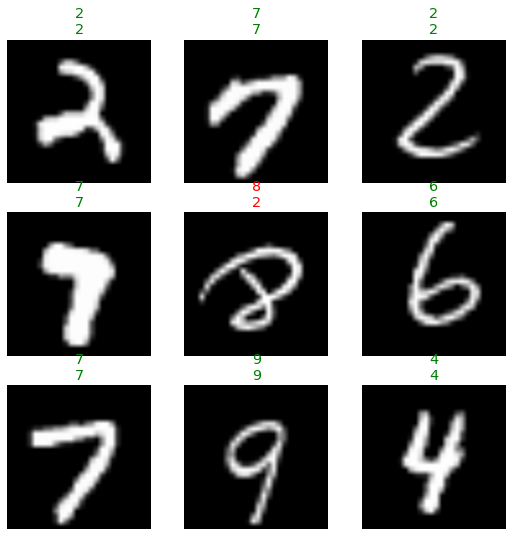

In [18]:
learn.show_results()

In [19]:
interp = Interpretation.from_learner(learn)

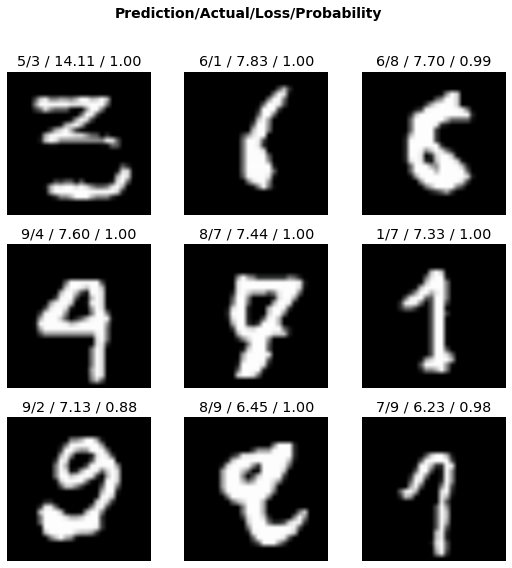

In [20]:
interp.plot_top_losses(9)


In [21]:
interp = ClassificationInterpretation.from_learner(learn)


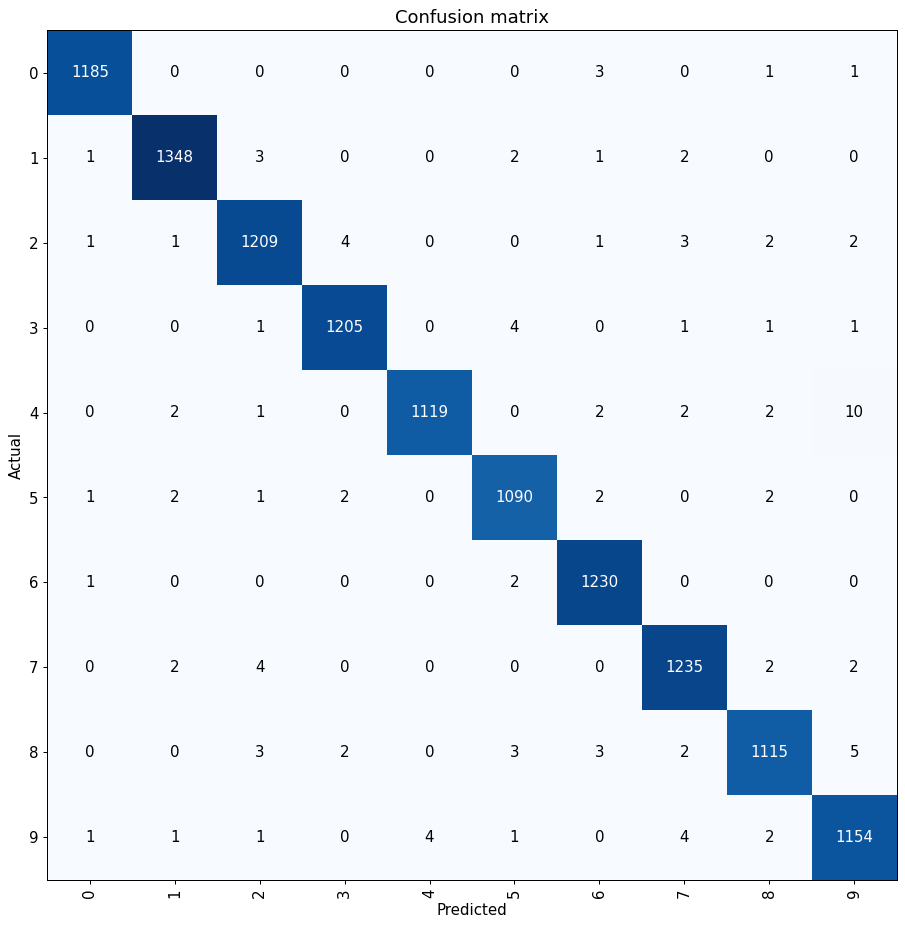

In [22]:
interp.plot_confusion_matrix(figsize=(10,15),cmap='Blues',dpi = 90)

In [23]:
path.ls()

(#2) [Path('testing'),Path('training')]

In [27]:
learn.export("digits_classifier_model.pkl")

In [26]:
path.ls()

(#2) [Path('testing'),Path('training')]

In [28]:
new_path = Path()

In [29]:
new_path.ls()

(#5) [Path('.config'),Path('digits_classifier.pkl'),Path('digits_classifier_model.pkl'),Path('gdrive'),Path('sample_data')]

In [31]:
Path.BASE_PATH.ls()

(#2) [Path('testing'),Path('training')]

In [33]:
new_path = Path()
learn_inf = load_learner(new_path/'digits_classifier_model.pkl')

In [37]:
path.ls()

(#2) [Path('testing'),Path('training')]

In [47]:
path.ls()
testing_path_3 = (path/'testing'/'3')
testing_path_3.ls()

(#1010) [Path('testing/3/9604.png'),Path('testing/3/1354.png'),Path('testing/3/5382.png'),Path('testing/3/5245.png'),Path('testing/3/5224.png'),Path('testing/3/7714.png'),Path('testing/3/2776.png'),Path('testing/3/4509.png'),Path('testing/3/4996.png'),Path('testing/3/3944.png')...]

In [48]:
learn_inf.predict((testing_path/'9604.png'))

('3',
 tensor(3),
 tensor([6.0016e-16, 5.0337e-13, 6.3952e-14, 1.0000e+00, 1.3839e-16, 7.5671e-13, 8.7530e-17, 4.9421e-15, 3.0289e-13, 7.6635e-14]))

In [44]:
list_of_images = [(testing_path/'9604.png') , (testing_path/'1354.png')]
list_of_images

[Path('testing/3/9604.png'), Path('testing/3/1354.png')]

In [52]:
img_path = (testing_path_3/'9604.png')
pred , pred_idx , probs = learn_inf.predict(img_path)
pred , pred_idx , probs

('3',
 tensor(3),
 tensor([6.0016e-16, 5.0337e-13, 6.3952e-14, 1.0000e+00, 1.3839e-16, 7.5671e-13, 8.7530e-17, 4.9421e-15, 3.0289e-13, 7.6635e-14]))

In [49]:
testing_path = (path/'testing')
list_of_images = get_image_files(testing_path)

In [50]:
list_of_images

(#10000) [Path('testing/3/9604.png'),Path('testing/3/1354.png'),Path('testing/3/5382.png'),Path('testing/3/5245.png'),Path('testing/3/5224.png'),Path('testing/3/7714.png'),Path('testing/3/2776.png'),Path('testing/3/4509.png'),Path('testing/3/4996.png'),Path('testing/3/3944.png')...]

In [51]:
len(list_of_images)

10000

In [54]:
list_of_images[0:5]

(#5) [Path('testing/3/9604.png'),Path('testing/3/1354.png'),Path('testing/3/5382.png'),Path('testing/3/5245.png'),Path('testing/3/5224.png')]

In [85]:
preds = []
preds_idx = []
prob_values = []
im_paths = []

for i in list_of_images[0:5]:
  pred , pred_idx , probs = learn_inf.predict(i)
  print(probs,type(probs))
  preds.append(pred)
  preds_idx.append(pred_idx)
  prob_values.append(probs)
  im_paths.append(i)


tensor([6.0016e-16, 5.0337e-13, 6.3952e-14, 1.0000e+00, 1.3839e-16, 7.5671e-13, 8.7530e-17, 4.9421e-15, 3.0289e-13, 7.6635e-14]) <class 'torch.Tensor'>


tensor([5.2952e-12, 2.6491e-09, 5.2996e-09, 1.0000e+00, 6.1578e-12, 3.1540e-08, 2.1976e-11, 7.3852e-09, 1.9650e-08, 2.1458e-09]) <class 'torch.Tensor'>


tensor([3.7792e-12, 2.2993e-11, 5.8034e-11, 1.0000e+00, 3.1809e-13, 5.5944e-09, 3.3408e-12, 6.8294e-11, 2.4742e-10, 2.2940e-11]) <class 'torch.Tensor'>


tensor([7.3777e-14, 8.7546e-13, 2.3260e-12, 1.0000e+00, 4.8695e-14, 2.0452e-09, 7.2193e-14, 6.5183e-12, 3.5936e-11, 1.8841e-11]) <class 'torch.Tensor'>


tensor([2.6719e-13, 4.2668e-12, 1.1263e-11, 1.0000e+00, 3.3249e-13, 1.8977e-08, 1.0650e-12, 2.4017e-12, 3.3543e-10, 2.0441e-10]) <class 'torch.Tensor'>


In [82]:
prob_values_tensor = torch.stack(prob_values).float()

In [81]:
type(prob_values[1])

torch.Tensor

In [86]:
im_paths

[Path('testing/3/9604.png'),
 Path('testing/3/1354.png'),
 Path('testing/3/5382.png'),
 Path('testing/3/5245.png'),
 Path('testing/3/5224.png')]

In [109]:
test_files = get_image_files(testing_path)
test_dl = learn.dls.test_dl(test_files, with_label=True)


In [110]:
pred_probas, _, pred_classes = learn.get_preds(dl=test_dl, with_decoded=True) 

In [111]:
test_dl = learn.dls.test_dl(test_files)

In [116]:
learn.dls[0]

In [101]:
test_dl

In [102]:
interp = ClassificationInterpretation.from_learner(learn)

In [103]:
losses,idxs = interp.top_losses()

In [105]:
interp = ClassificationInterpretation.from_learner(learn, ds_type=DatasetType.Valid)



NameError: ignored

In [108]:
data_test = (ImageItemList.from_folder(path)
.split_by_folder(train='training',valid='testing')
.label_from_folder()
.transform( size=224)
.databunch(bs=bs)).normalize(imagenet_stats)

NameError: ignored